In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn
df=pd.read_excel("Sleep_health_lifestyle.xlsx")
#İlk 2 örnek üzerinden neye benzediğini görelim.
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [3]:
#Son iki satırın değerlerini gösterir.
df.tail(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

Elimizde ki verilerde her bir sütunun toplamda kaç adet eksik değeri olduğunu belirtir.

In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Elimizde ki verilerde her bir sütunun toplamda kaç adet benzersiz(unique) değeri olduğunu belirtir.

In [6]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

Sütun isimlerini değiştirelim ve kodun doğruluğundan emin olmak için ilk 2 satırın değerlerine bakalım.

In [7]:
df.rename(columns={"Person ID	":"Kişi Kimliği",
               "Gender" :"Cinsiyet",
               "Age":"Yaş",
               "Occupation":"Meslek",
               "Sleep Duration":"Uyku_Süresi",
               "Quality of Sleep":"Uyku_Kalitesi",
               "Physical Activity Level":"Fiziksel_Aktivite_Seviyesi",
               "Stress Level":"Stres_Seviyesi",
               "BMI Category":"BMI_Kategorisi",
               "Blood Pressure":"Tansiyon",
               "Heart Rate":"Kalp_Hızı",
               "Daily Steps":"Günlük_Adımlar"},inplace=True)

df.head(2)


,Person ID,Cinsiyet,Yaş,Meslek,Uyku_Süresi,Uyku_Kalitesi,Fiziksel_Aktivite_Seviyesi,Stres_Seviyesi,BMI_Kategorisi,Tansiyon,Kalp_Hızı,Günlük_Adımlar,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


Temel istatistik değerlerini görelim.

In [8]:
df.describe()

,Person ID,Yaş,Uyku_Süresi,Uyku_Kalitesi,Fiziksel_Aktivite_Seviyesi,Stres_Seviyesi,Kalp_Hızı,Günlük_Adımlar
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Elimizde ki verilerde birbirinden farklı toplam kaç adet meslek olduğunu ve bu mesleklerin neler olduğunu gördük.

In [9]:
eşsiz_meslek=pd.unique(df.Meslek)
print("Tek meslek sayısı:{}".format(len(eşsiz_meslek)))
eşsiz_meslek

Tek meslek sayısı:11


array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

Belirli değişkenlerin histogram grafiğini çizdirelim

In [13]:
def plotHist(degisken):
    plt.figure()
    plt.hist(df[degisken],bins=30,color="mediumseagreen")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri sıklığı-{}".format(degisken))
    plt.show

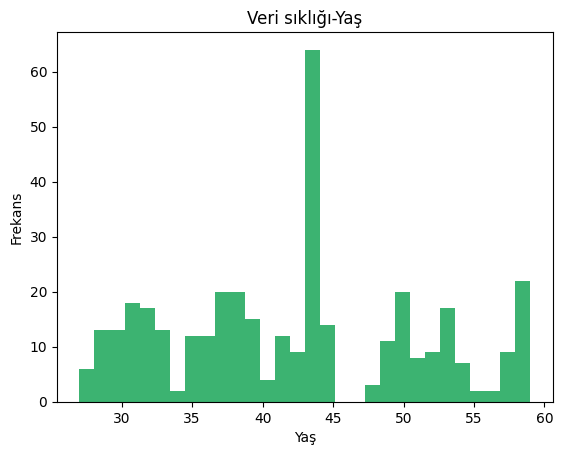

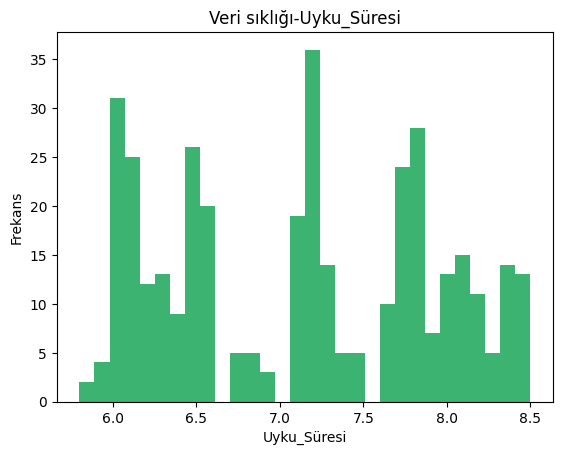

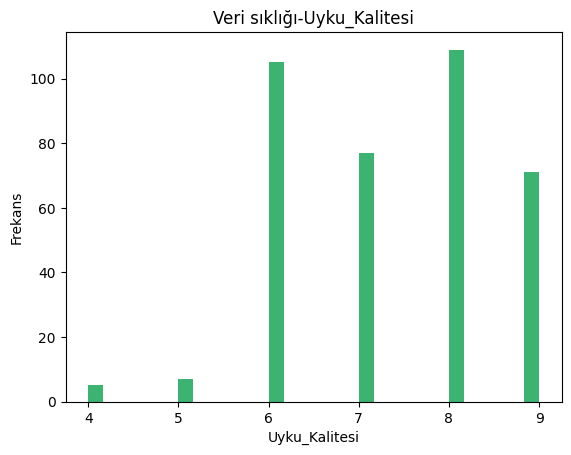

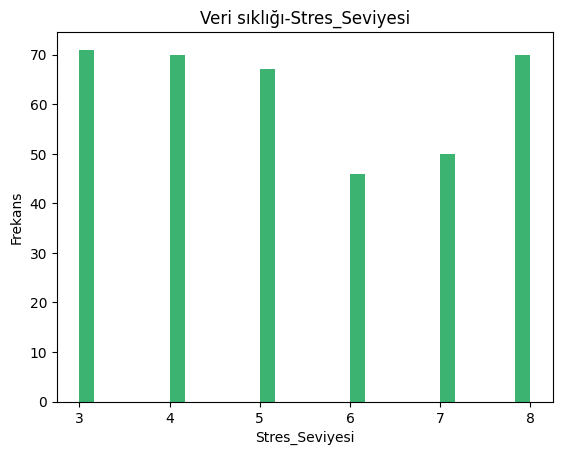

In [12]:
degisken=["Yaş","Uyku_Süresi","Uyku_Kalitesi","Stres_Seviyesi"]
for i in degisken:
    plotHist(i)

Cinsiyete göre uyku süresinin ve uyku kalitesinin karşılaştırılması

In [11]:
Erkek=df[df.Cinsiyet=="Male"]
Erkek.head(3)

,Person ID,Cinsiyet,Yaş,Meslek,Uyku_Süresi,Uyku_Kalitesi,Fiziksel_Aktivite_Seviyesi,Stres_Seviyesi,BMI_Kategorisi,Tansiyon,Kalp_Hızı,Günlük_Adımlar,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [14]:
Kadın=df[df.Cinsiyet=="Female"]
Kadın.head(3)

,Person ID,Cinsiyet,Yaş,Meslek,Uyku_Süresi,Uyku_Kalitesi,Fiziksel_Aktivite_Seviyesi,Stres_Seviyesi,BMI_Kategorisi,Tansiyon,Kalp_Hızı,Günlük_Adımlar,Sleep Disorder
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia
30,31,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea


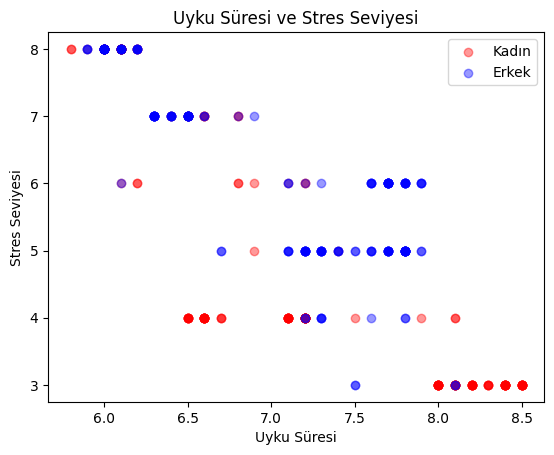

In [15]:
plt.figure()
plt.scatter(Kadın.Uyku_Süresi,Kadın.Stres_Seviyesi,alpha=0.4,label="Kadın",c="r")
plt.scatter(Erkek.Uyku_Süresi,Erkek.Stres_Seviyesi, alpha=0.4,label= "Erkek",c="b")
plt.xlabel("Uyku Süresi")
plt.ylabel("Stres Seviyesi")
plt.title("Uyku Süresi ve Stres Seviyesi")
plt.legend()
plt.show()

Grafik, cinsiyete göre uyku süresi ve stres seviyesi arasındaki ilişkiyi göstermektedir. 

Hem erkekler hem de kadınlar için uyku süresi ile stres seviyesi arasında negatif bir korelasyon vardır. Bu, uyku süresi arttıkça stres seviyesinin de düşme eğiliminde olduğu anlamına gelir.Yeterince uyumanın hem erkekler hem de kadınlar için stres düzeylerini azaltmada önemli olduğunu, ancak bu etkinin erkekler için daha belirgin olduğunu göstermektedir. 

Erkekler ve kadınlar, aynı miktarda uyuduklarında bile erkekler daha yüksek stres seviyeleri bildirmektedir.
Bu fark en çok 6.5-7.5 saatlik uyku aralığında belirgindir.
İki cinsiyetin stres seviyeleri aynıyken ise genellikle erkeklerin uyku süresi daha fazladır. Bu fark en çok
6-7.5 aralığındadır.

In [16]:
df_geçici=df.copy()
df_geçici=pd.get_dummies(df_geçici,columns=["BMI_Kategorisi"])
df_geçici.head(2)

,Person ID,Cinsiyet,Yaş,Meslek,Uyku_Süresi,Uyku_Kalitesi,Fiziksel_Aktivite_Seviyesi,Stres_Seviyesi,Tansiyon,Kalp_Hızı,Günlük_Adımlar,Sleep Disorder,BMI_Kategorisi_Normal,BMI_Kategorisi_Normal Weight,BMI_Kategorisi_Obese,BMI_Kategorisi_Overweight
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,NaN,False,False,False,True
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,True,False,False,False


Burda bazi verilerin max ve min değerleri verilmiştir.

In [17]:
print("Günlük Adım Aralığı: ",min(df_geçici["Günlük_Adımlar"]), ",", max(df_geçici["Günlük_Adımlar"]))
print("Kalp Hızı", min(df_geçici["Kalp_Hızı"]),",",max(df_geçici["Kalp_Hızı"]))
print("Fiziksel Aktivite Seviyesi: ",min(df_geçici["Fiziksel_Aktivite_Seviyesi"]), ",", max(df_geçici["Fiziksel_Aktivite_Seviyesi"]))
print("Yaş: ",min(df_geçici["Yaş"]),",",max(df_geçici["Yaş"]))

Günlük Adım Aralığı:  3000 , 10000
Kalp Hızı 65 , 86
Fiziksel Aktivite Seviyesi:  30 , 90
Yaş:  27 , 59


Yaşın Fiziksel Aktivite Seviyesine etkisini bulalım

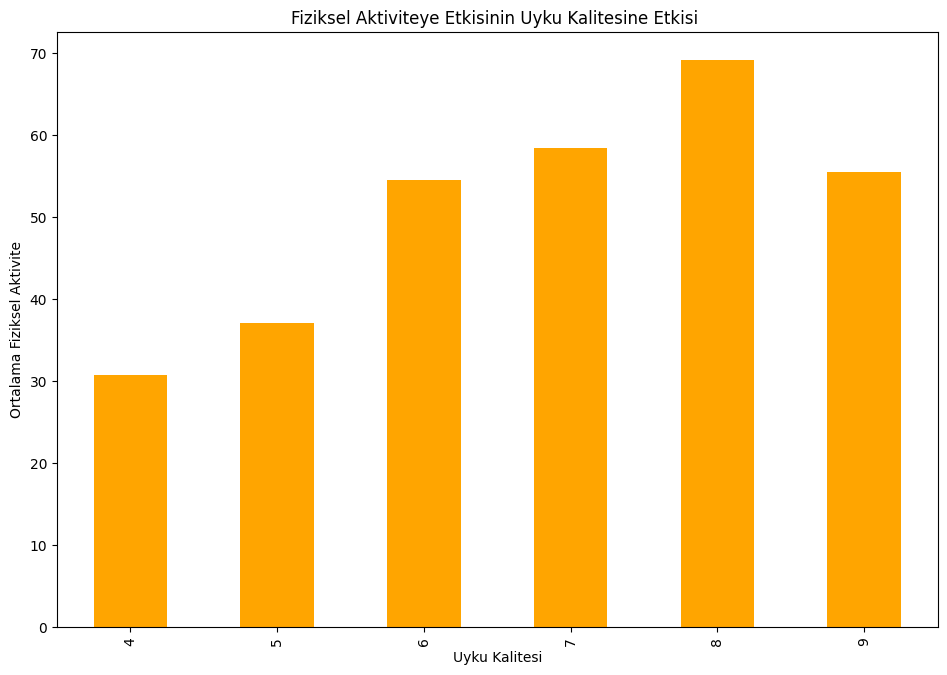

In [18]:
fig=plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
yaş_sıralı = df_geçici["Uyku_Kalitesi"].sort_values()

# Yaşa göre fiziksel aktiviteyi gruplandıralım ve ortalama alalım
aktivite_ortalama = df_geçici.groupby(yaş_sıralı)["Fiziksel_Aktivite_Seviyesi"].mean()

aktivite_ortalama.plot(kind="bar", color="orange")
plt.title("Fiziksel Aktiviteye Etkisinin Uyku Kalitesine Etkisi ")
plt.xlabel("Uyku Kalitesi")
plt.ylabel("Ortalama Fiziksel Aktivite")

plt.show()

Fiziksel aktivite arttıkça uyku kalitesi de artar. Yani uyku kalitesi ile fiziksel aktivite arasında pozitif bir korelasyon vardır ama bu korelasyon doğrusal değildir.

ortalama yaşa göre BMI

In [19]:
df_geçici=df.copy()
df_geçici=pd.get_dummies(df_geçici,columns=["BMI_Kategorisi"])
df_geçici.head(2)

,Person ID,Cinsiyet,Yaş,Meslek,Uyku_Süresi,Uyku_Kalitesi,Fiziksel_Aktivite_Seviyesi,Stres_Seviyesi,Tansiyon,Kalp_Hızı,Günlük_Adımlar,Sleep Disorder,BMI_Kategorisi_Normal,BMI_Kategorisi_Normal Weight,BMI_Kategorisi_Obese,BMI_Kategorisi_Overweight
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,NaN,False,False,False,True
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,True,False,False,False


In [20]:
ortalama_bmi = df.groupby('BMI_Kategorisi')["Yaş"].mean()

print("BMI Kategorisine Göre Ortalama Yaşlar")
print(ortalama_bmi)

BMI Kategorisine Göre Ortalama Yaşlar
BMI_Kategorisi
Normal           38.482051
Normal Weight    38.380952
Obese            38.000000
Overweight       47.885135
Name: Yaş, dtype: float64


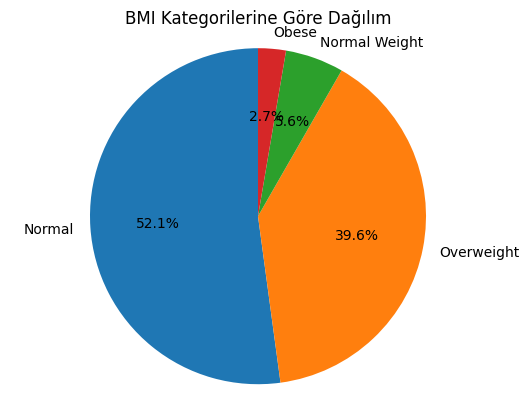

In [21]:
kategori_frekans = df['BMI_Kategorisi'].value_counts()
kategoriler = kategori_frekans.index.tolist()
frekanslar = kategori_frekans.tolist()
plt.pie(frekanslar, labels=kategoriler, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('BMI Kategorilerine Göre Dağılım')
plt.show()

Verilere göre kişilerin stres seviyelerinin toplam sayısı

<Axes: xlabel='Stres_Seviyesi', ylabel='count'>

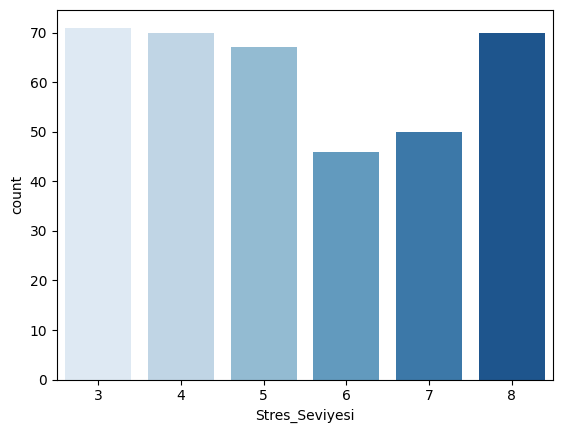

In [24]:
sbn.countplot(df_geçici,x="Stres_Seviyesi",palette="Blues")

Günlük Adım Atmanın Etkilerini Göstreir

In [25]:
df_geçici.corr(numeric_only = True)["Günlük_Adımlar"].sort_values()

BMI_Kategorisi_Obese           -0.355639
Uyku_Süresi                    -0.039533
Kalp_Hızı                      -0.030309
BMI_Kategorisi_Normal Weight   -0.007575
Uyku_Kalitesi                   0.016791
Person ID                       0.043844
BMI_Kategorisi_Normal           0.045434
Yaş                             0.057973
BMI_Kategorisi_Overweight       0.074473
Stres_Seviyesi                  0.186829
Fiziksel_Aktivite_Seviyesi      0.772723
Günlük_Adımlar                  1.000000
Name: Günlük_Adımlar, dtype: float64

Günlük adım atma ve fiziksel aktivite düzeyi için korelasyon katsayısı 0,772723'tür ve bu güçlü bir pozitif korelasyondur. Bu, fiziksel aktivite düzeyi arttıkça günlük adım atmanın da artma eğiliminde olduğu anlamına gelmektedir.
Günlük adımlama ve stres düzeyi için korelasyon katsayısı 0,186829'dur ve bu da orta düzeyde zayıf ve pozitif bir korelasyondur. Bu, stres düzeyi arttıkça günlük adım atmanın da artma eğiliminde olduğu anlamına gelmektedir.
Günlük adımlama ile BMI_Kategorisi_Obese arasındaki korelasyon katsayısı -0,355639 olup orta düzeyde negatif bir korelasyondur. Bu da BMI_Kategorisi_Obese arttıkça günlük adım atmanın azalma eğiliminde olduğu anlamına gelmektedir.
Diğer korelasyonlar daha zayıftır.

<Axes: xlabel='Yaş', ylabel='Kalp_Hızı'>

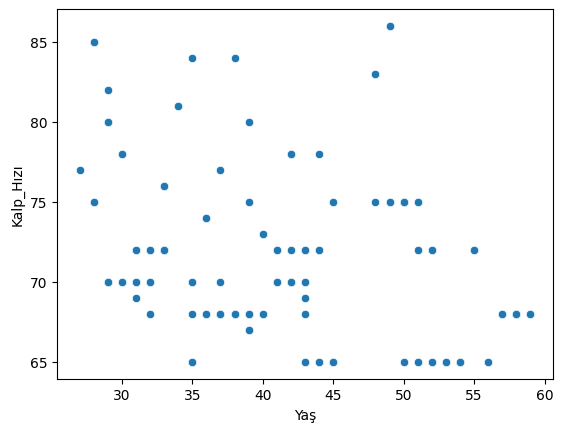

In [27]:
sbn.scatterplot(x="Yaş",y="Kalp_Hızı",data=df_geçici)

Grafik, kalp atış hızı ile yaş arasında negatif bir korelasyon olduğunu göstermektedir. Bu, yaş arttıkça kalp atış hızının düşme eğiliminde olduğu anlamına gelir. 

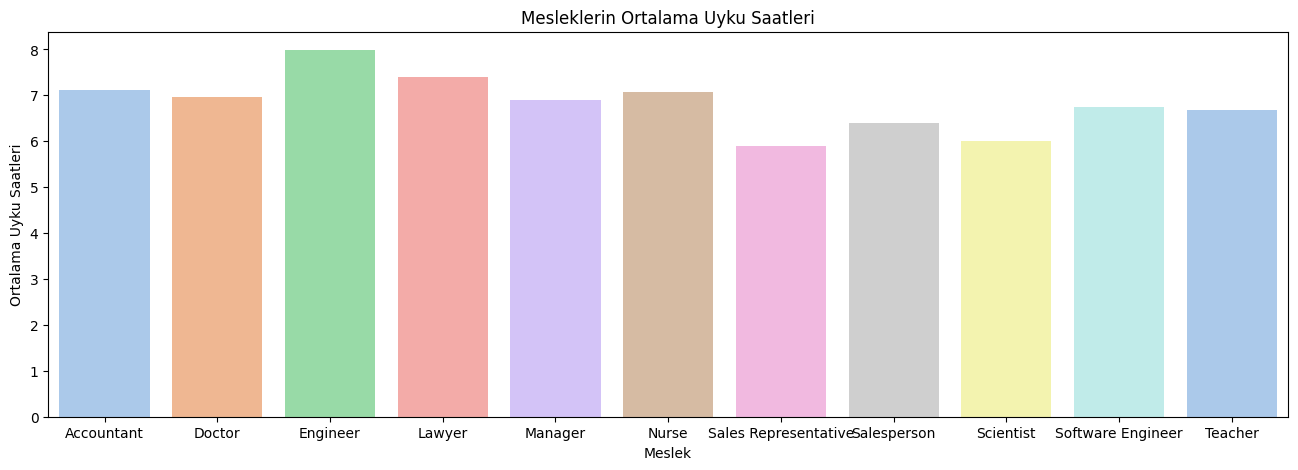

In [28]:
df_geçici= df_geçici[df_geçici['Meslek'].isin(['Sales Representative','Doctor','Software Engineer','Teacher','Scientist'])]


meslek_uyku = df.groupby('Meslek')['Uyku_Süresi'].mean()


plt.figure(figsize=(16,5))
sbn.barplot(x=meslek_uyku.index, y=meslek_uyku.values, palette='pastel',saturation=0.75)
plt.xlabel('Meslek')
plt.ylabel('Ortalama Uyku Saatleri')
plt.title('Mesleklerin Ortalama Uyku Saatleri')
plt.show()

Elimizde ki verilere bakılırsa en çok uyuyan meslek mühendislik iken en az uyuyan meslek ise satış temsilcisidir.

In [30]:
en_cok_meslek = df_geçici['Meslek'].value_counts().idxmax()

print("En çok yapılan meslek: ", en_cok_meslek)

En çok yapılan meslek:  Doctor


In [31]:
meslek_stres = df_geçici.groupby('Meslek')['Stres_Seviyesi'].mean().sort_values(ascending=False)

en_cok_stresli_meslek = meslek_stres.idxmax()

print("En stresli meslek: ", en_cok_stresli_meslek)

En stresli meslek:  Sales Representative


In [32]:
meslek_obezlik = df_geçici.groupby('Meslek')['BMI_Kategorisi_Obese'].mean().sort_values()

en_yakin_obez_meslek = meslek_obezlik.idxmax()

print("Obez olmaya en yakın meslek: ", en_yakin_obez_meslek)

Obez olmaya en yakın meslek:  Sales Representative


In [33]:
en_yasli_meslek = df.groupby('Meslek')['Yaş'].max()
en_yasli_meslek = en_yasli_meslek[en_yasli_meslek == en_yasli_meslek.max()]

print("En yüksek yaşa sahip meslek:")
print(en_yasli_meslek)

En yüksek yaşa sahip meslek:
Meslek
Nurse    59
Name: Yaş, dtype: int64


In [34]:
en_dusuk_yasli_meslek = df.groupby('Meslek')['Yaş'].min()
en_dusuk_yasli_meslek = en_dusuk_yasli_meslek[en_dusuk_yasli_meslek == en_dusuk_yasli_meslek.min()]

print("En düşük yaşa sahip olan meslek:")
print(en_dusuk_yasli_meslek)


En düşük yaşa sahip olan meslek:
Meslek
Software Engineer    27
Name: Yaş, dtype: int64


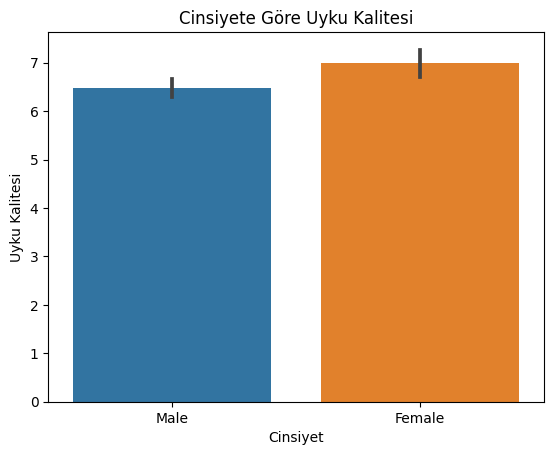

In [35]:
kadın_uyku_kalitesi = df_geçici[df_geçici['Cinsiyet'] == 'Kadın']['Uyku_Kalitesi']
erkek_uyku_kalitesi = df_geçici[df_geçici['Cinsiyet'] == 'Erkek']['Uyku_Kalitesi']

# Grafik çizimi
sbn.barplot(x='Cinsiyet', y='Uyku_Kalitesi', data=df_geçici)
plt.xlabel('Cinsiyet')
plt.ylabel('Uyku Kalitesi')
plt.title('Cinsiyete Göre Uyku Kalitesi')
plt.show()

Cinsiyete göre kadınların uyku kalitesinin daha yüksek olduğu görülmüştür.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22984\3568666641.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sbn.lineplot(x='Meslek', y='Günlük_Adımlar', data=df_geçici, ci=None, label='Günlük Adımlar')


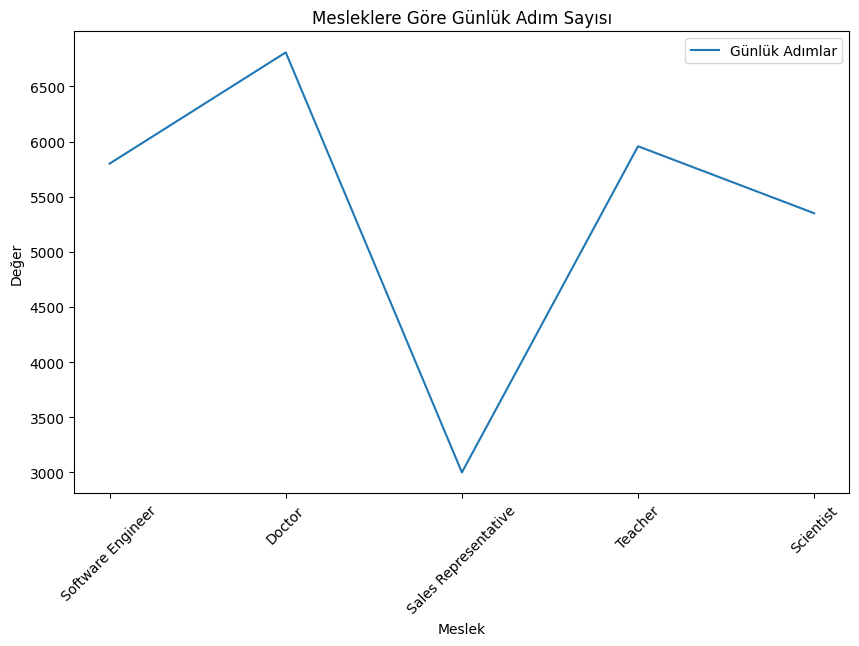

In [36]:
plt.figure(figsize=(10, 6))

sbn.lineplot(x='Meslek', y='Günlük_Adımlar', data=df_geçici, ci=None, label='Günlük Adımlar')
plt.xlabel('Meslek')
plt.ylabel('Değer')
plt.title('Mesleklere Göre Günlük Adım Sayısı')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Elimizde ki verilere göre en az günlük adım sayısını sales representative atmaktadır.

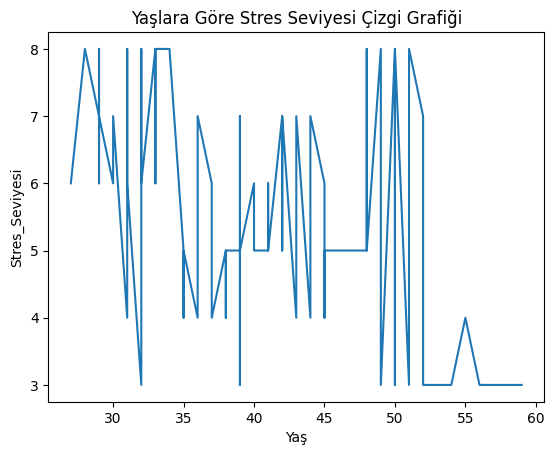

In [37]:
plt.plot(df['Yaş'], df['Stres_Seviyesi'])
plt.xlabel('Yaş')
plt.ylabel('Stres_Seviyesi')
plt.title('Yaşlara Göre Stres Seviyesi Çizgi Grafiği')
plt.show()